In [30]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from numpy import *

from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean
from scipy.stats import * #chi2_contingency로 카이제곱통계량계산
from scipy.stats import norm

import keyword
import random

#open api 불러올 때 필요한 것
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# 그래프에서 한글 깨지지 않기 위헤 사용함
from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

import FinanceDataReader as fdr
import plotly.graph_objects as go
import plotly.subplots as ms
import math

import tensorflow as tf

import qgrid

# Lecture 14 회귀분석과 머신러닝
- LN13: binary 종속변수
- 전통적 계량방식 sm.logit 저번에 했음 MLE
- 오늘은 ML로다가 해본다. 경사하강법쓴다.

In [31]:
# part 2 실습

In [32]:
def sigmoid(z):
    return 1/(1+np.exp(-z)) # 이 값은 무조건 0~1의 값이 나오게 된다
sigmoid(1)

0.7310585786300049

In [33]:
# 73%

In [34]:
z=np.arange(-6,6,0.2) # -6에서 6까지 0.2의 간격으로
z

array([-6.00000000e+00, -5.80000000e+00, -5.60000000e+00, -5.40000000e+00,
       -5.20000000e+00, -5.00000000e+00, -4.80000000e+00, -4.60000000e+00,
       -4.40000000e+00, -4.20000000e+00, -4.00000000e+00, -3.80000000e+00,
       -3.60000000e+00, -3.40000000e+00, -3.20000000e+00, -3.00000000e+00,
       -2.80000000e+00, -2.60000000e+00, -2.40000000e+00, -2.20000000e+00,
       -2.00000000e+00, -1.80000000e+00, -1.60000000e+00, -1.40000000e+00,
       -1.20000000e+00, -1.00000000e+00, -8.00000000e-01, -6.00000000e-01,
       -4.00000000e-01, -2.00000000e-01,  5.32907052e-15,  2.00000000e-01,
        4.00000000e-01,  6.00000000e-01,  8.00000000e-01,  1.00000000e+00,
        1.20000000e+00,  1.40000000e+00,  1.60000000e+00,  1.80000000e+00,
        2.00000000e+00,  2.20000000e+00,  2.40000000e+00,  2.60000000e+00,
        2.80000000e+00,  3.00000000e+00,  3.20000000e+00,  3.40000000e+00,
        3.60000000e+00,  3.80000000e+00,  4.00000000e+00,  4.20000000e+00,
        4.40000000e+00,  

In [35]:
sig=sigmoid(z)
print(sig)

[0.00247262 0.00301842 0.00368424 0.00449627 0.0054863  0.00669285
 0.00816257 0.0099518  0.01212843 0.01477403 0.01798621 0.02188127
 0.02659699 0.03229546 0.03916572 0.04742587 0.05732418 0.06913842
 0.0831727  0.09975049 0.11920292 0.14185106 0.16798161 0.19781611
 0.23147522 0.26894142 0.31002552 0.35434369 0.40131234 0.450166
 0.5        0.549834   0.59868766 0.64565631 0.68997448 0.73105858
 0.76852478 0.80218389 0.83201839 0.85814894 0.88079708 0.90024951
 0.9168273  0.93086158 0.94267582 0.95257413 0.96083428 0.96770454
 0.97340301 0.97811873 0.98201379 0.98522597 0.98787157 0.9900482
 0.99183743 0.99330715 0.9945137  0.99550373 0.99631576 0.99698158]


AttributeError: module 'matplotlib.pyplot' has no attribute 'gird'

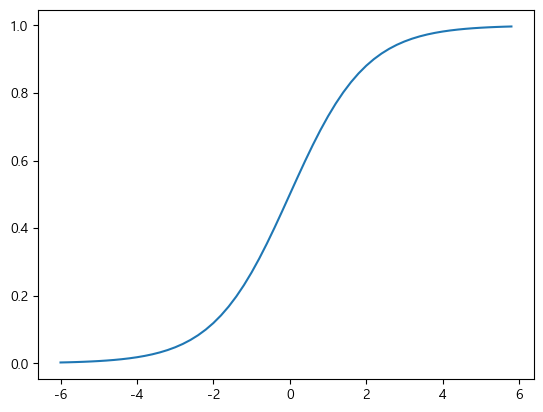

In [36]:
plt.plot(z,sig)
plt.gird
plt.show()

In [37]:
# s자 형태의 시그모이드 함수가 그려진다

In [38]:
# 실제 데이터를 가지고 ML방식으로 y변수와 x변수의 관계를 추정하자. W*X_b , W와 b를 추정한다.
# y변수는 0과 1, 2개 범주를 가지는 변수이다. binary dependent variable

## 1.5 불황과 호황예측

In [39]:
# 로짓분석(범주가 2개) 머신러닝 방식을 이용하여 거시 데이터에 기반한 호황(1)과 불황(0)을 예측해보자
# Pr(y=1) : 호황일 확률
# 해당데이터는 한국은행 경제통계시스템(ECOS) Open API를 이용하여 입수할 수 있음

In [40]:
df=pd.read_csv('c:/temp/MACRO_Binary.csv')
df.head()

,Unnamed: 0,YYM,REALGDP,REALCONS,INV,M2,INFL,UNEMP,EMPLOY,CD_3M,RollingMean,TARGET1,QUARTER_2,QUARTER_3,QUARTER_4
0,19,200609,1.6,1.1,7.383225,0.034784,0.012735,3.5,0.219907,4.64,1.265,0.0,0,1,0
1,20,200612,0.8,1.4,-4.720107,0.028761,-0.006775,3.4,0.535845,4.76,1.215,1.0,0,0,1
2,21,200703,1.7,1.2,6.486645,0.013717,0.014624,3.2,0.659054,4.94,1.175,1.0,0,0,0
3,22,200706,1.7,1.7,4.321228,0.028269,0.004800,3.2,0.198935,5.03,1.170,1.0,1,0,0
4,23,200709,1.2,1.1,-3.417600,0.026569,0.010518,3.2,0.179834,5.34,1.130,1.0,0,1,0


In [41]:
# REALGDP: 실질GDP의 증가율
# TARGET1: 호황/불황

In [42]:
df['TARGET1'].value_counts()

0.0    32
1.0    23
Name: TARGET1, dtype: int64

In [43]:
# 32분기는 불황, 23분기는 호황

In [44]:
# x와 y의 data frame을 만든다.
x_data=df[['REALGDP','REALCONS','INV']]
x_data.head()

,REALGDP,REALCONS,INV
0,1.6,1.1,7.383225
1,0.8,1.4,-4.720107
2,1.7,1.2,6.486645
3,1.7,1.7,4.321228
4,1.2,1.1,-3.417600


In [45]:
y_data=df['TARGET1']
y_data.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: TARGET1, dtype: float64

In [46]:
# ML 방식은 tensor flow 에서 사용해야 한다. data frame -> numpy array 형식으로 바꿔야 한다.
x_data=x_data.to_numpy()
y_data=y_data.to_numpy()

In [47]:
type(x_data)

numpy.ndarray

In [48]:
# x_data에 대해서 정규화를 한다
# 정규화: 모든 값을 0~1 사이의 값으로 바꾼다. 변수들 간 범위가 다 너무 다르기 때문에 , 범위를 맞춰준다
# X_정규화=(X-X_min)/(X_max-X_min)
# X=X_max 이면 X_정규화=1

In [49]:
x_data_norm=MinMaxScaler().fit_transform(x_data)
x_data_norm

array([[0.77777778, 0.75247525, 0.73784493],
       [0.65079365, 0.78217822, 0.41754596],
       [0.79365079, 0.76237624, 0.7141181 ],
       [0.79365079, 0.81188119, 0.65681316],
       [0.71428571, 0.75247525, 0.45201513],
       [0.87301587, 0.73267327, 0.72291107],
       [0.58730159, 0.74257426, 0.58282057],
       [0.6031746 , 0.63366337, 0.69765418],
       [0.65079365, 0.63366337, 0.69653629],
       [0.        , 0.26732673, 0.        ],
       [0.53968254, 0.61386139, 0.31888721],
       [0.73015873, 1.        , 0.70653259],
       [1.        , 0.75247525, 1.        ],
       [0.63492063, 0.74257426, 0.53862911],
       [0.84126984, 0.73267327, 0.8443659 ],
       [0.82539683, 0.73267327, 0.43615468],
       [0.71428571, 0.74257426, 0.63506522],
       [0.71428571, 0.72277228, 0.65919998],
       [0.66666667, 0.76237624, 0.61942298],
       [0.6031746 , 0.71287129, 0.65071241],
       [0.6031746 , 0.62376238, 0.32783345],
       [0.6031746 , 0.66336634, 0.72123848],
       [0.

In [50]:
# 3개의 칼럼. x 변수가 3개였으니까

In [52]:
# array structure에서 최대 최소를 보려면
# 최솟값
np.min(x_data_norm, axis=0) # axis=0 : 칼럼 방향

array([0., 0., 0.])

In [53]:
# 최댓값
np.max(x_data_norm, axis=0) # axis=0 : 칼럼 방향

array([1., 1., 1.])

In [54]:
# 정규화를 하니 0~1로 범위가 바뀐걸 볼 수 있다

In [55]:
# x_data_norm, y_data: float32 (float32로 저장되어 있어야 tensor flow에서 사용할 수 있다)
x_data_norm=x_data_norm.astype('float32')
y_data=y_data.astype('float32')

In [57]:
# 여기서부터 우리는 ML을 이용한 경사하강법으로 W와 b를 찾는다 계산한다

In [59]:
# 먼저 x 변수의 개수를 계산한다
k=x_data_norm.shape[1]
print(k)

3


In [61]:
# W와 b에 대한 초기값을 설정하자
# random seed를 주고 시작한다.

tf.random.set_seed(1234)
learning_rate=tf.Variable(0.0001)
W=tf.Variable(tf.random.normal((k,1),name='Weignt'))
b=tf.Variable(tf.random.normal([1]),name='bias')

print(W.numpy(),b.numpy()) # 초기값 보기

[[ 0.8369314]
 [-0.7342977]
 [ 1.0402943]] [1.1468066]


In [62]:
# W 3개/ b 1개

In [64]:
# 10000번 실행한다
for i in range(10000+1):
    with tf.GradientTape() as tape:
        hypothesis=tf.sigmoid(tf.matmul(x_data_norm,W)+b) # tensor flow 내에 내장된 sigmoid 함수 들어가 있다. hypothesis=H(x)
        cost=-tf.reduce_mean(y_data*tf.math.log(hypothesis)+(1-y_data)*tf.math.log(1-hypothesis))
        W_grad, b_grad=tape.gradient(cost,[W,b])
        # W, b를 경사하강법에 의해 update 한다
        W.assign_sub(learning_rate*W_grad)
        b.assign_sub(learning_rate*b_grad)
        # 다른 부분은 다 같고, hypothesis, cost만 잘 정의하면 됨
    
    # 결과보기
    if i%1000==0:
        print(i,cost.numpy(),W.numpy().flatten(),b.numpy())

0 0.88241714 [ 0.59385544 -0.9909419   0.82270795] [0.77646405]
1000 0.862748 [ 0.57447183 -1.0113261   0.80529237] [0.7469369]
2000 0.8448178 [ 0.5559652 -1.0307744  0.7886523] [0.718742]
3000 0.82851267 [ 0.5383181 -1.0493045  0.772772 ] [0.6918513]
4000 0.8137188 [ 0.52150935 -1.0669377   0.75763315] [0.6662327]
5000 0.80032325 [ 0.50551546 -1.0837008   0.7432157 ] [0.64184976]
6000 0.7882154 [ 0.49031183 -1.0996213   0.72949684] [0.6186633]
7000 0.7772892 [ 0.47587073 -1.1147295   0.7164541 ] [0.59663224]
8000 0.7674446 [ 0.4621645  -1.1290513   0.70406175] [0.5757136]
9000 0.75858533 [ 0.4491642 -1.1426226  0.6922957] [0.55586296]
10000 0.7506217 [ 0.4368408 -1.1554717  0.6811289] [0.53703636]


In [66]:
# 1000번 단위로 결과 나옴
# 10000 0.7506217 [ 0.4368408 -1.1554717  0.6811289] [0.53703636] : 요게 원하는 결과
# 0.4368408 : 소득이 증가할 수록 경기가 호황일 가능성이 크다
# -1.1554717  : 소비 증가율이 높을 수록 경ㄱ 호황 가능성 작다
# 0.6811289 : 투자 증가율이 높을 수록 호황 가능성 높다
# RealGDP 증가율이 높아질수록 y=1(호황)일 가능성이 증가한다.
# RealCons 증가율이 높아질수록 y=1(호황)일 가능성이 감소한다.
# INV 증가율이 높아질수록 y=1(호황)일 가능성이 증가한다.

In [67]:
# 시간이 되면 위 데이터 가지고 y,x 가지고 전통적 계량ㄱ여제학적 추정인 sm.Logit 결과도 한번 얻어보세요